## Modelling

- [Preprocessing](#Preprocessing)
- [EDA & Modeling](#EDA-&-Modeling)
- [Evaluation and Conceptual Understanding](#Evaluation-and-Conceptual-Understanding)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)
---

In [1]:
# imports:

#maths
import pandas as pd
import numpy as np
import scipy.stats as stats

#visual
import seaborn as sns
import matplotlib.pyplot as plt

#modelling
from sklearn.linear_model import LinearRegression, LassoCV, Lasso
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt

from IPython.display import SVG
#!pip3 install xgboost
from xgboost import XGBRegressor
import xgboost as xgb
import time
from xgboost import plot_importance

%matplotlib inline

#To visualize the whole grid
pd.options.display.max_columns = 999

plt.style.use('fivethirtyeight')

import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

Using TensorFlow backend.


In [2]:
airbnb_df = pd.read_csv('../data/listings_cleaned.csv')

In [3]:
airbnb_df.head()

,id,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,availability_90,instant_bookable,cancellation_policy,host_active,phone,email,id_verification,review,photo,socials,others,grouped_property_type,air_con,wifi,washer,essentials,kitchen,hangers,iron,tv,hair_dryer,shampoo,laptop_workspace,elevator,dryer,hot_water,bedroom_lock,pool,refrigerator,long_term_stays,gym,microwave
0,49091,0,2,0,Woodlands,North Region,1,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,4.430817,0.0,0.0,1,14.0,180,90,0,flexible,3417.0,1,1,1,1,1,1,1,apartment,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,50646,0,1,0,Bukit Timah,Central Region,1,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,4.382027,0.0,0.0,2,20.0,90,90,0,moderate,3459.0,1,1,1,1,1,1,0,apartment,1,1,1,1,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0
2,56334,0,2,0,Woodlands,North Region,1,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,4.248495,0.0,0.0,1,14.0,6,90,0,flexible,3417.0,1,1,1,1,1,1,1,apartment,1,1,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0
3,71609,0,8,1,Tampines,East Region,1,Villa,Private room,6,1.0,2.0,3.0,Real Bed,5.332719,279.0,56.0,4,28.0,1,90,1,flexible,3316.0,1,1,0,1,0,0,1,others,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,1,0,0
4,71896,0,8,1,Tampines,East Region,1,House,Private room,3,0.5,1.0,1.0,Real Bed,4.553877,140.0,28.0,1,21.0,1,90,1,moderate,3316.0,1,1,0,1,0,0,1,apartment,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0


In [4]:
airbnb_df_dum = pd.get_dummies(airbnb_df)

In [5]:
airbnb_df_dum

,id,host_is_superhost,host_listings_count,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,availability_90,instant_bookable,host_active,phone,email,id_verification,review,photo,socials,others,air_con,wifi,washer,essentials,kitchen,hangers,iron,tv,hair_dryer,shampoo,laptop_workspace,elevator,dryer,hot_water,bedroom_lock,pool,refrigerator,long_term_stays,gym,microwave,neighbourhood_cleansed_Ang Mo Kio,neighbourhood_cleansed_Bedok,neighbourhood_cleansed_Bishan,neighbourhood_cleansed_Bukit Batok,neighbourhood_cleansed_Bukit Merah,neighbourhood_cleansed_Bukit Panjang,neighbourhood_cleansed_Bukit Timah,neighbourhood_cleansed_Central Water Catchment,neighbourhood_cleansed_Choa Chu Kang,neighbourhood_cleansed_Clementi,neighbourhood_cleansed_Downtown Core,neighbourhood_cleansed_Geylang,neighbourhood_cleansed_Hougang,neighbourhood_cleansed_Jurong East,neighbourhood_cleansed_Jurong West,neighbourhood_cleansed_Kallang,neighbourhood_cleansed_Lim Chu Kang,neighbourhood_cleansed_Mandai,neighbourhood_cleansed_Marina South,neighbourhood_cleansed_Marine Parade,neighbourhood_cleansed_Museum,neighbourhood_cleansed_Newton,neighbourhood_cleansed_Novena,neighbourhood_cleansed_Orchard,neighbourhood_cleansed_Outram,neighbourhood_cleansed_Pasir Ris,neighbourhood_cleansed_Pioneer,neighbourhood_cleansed_Punggol,neighbourhood_cleansed_Queenstown,neighbourhood_cleansed_River Valley,neighbourhood_cleansed_Rochor,neighbourhood_cleansed_Sembawang,neighbourhood_cleansed_Sengkang,neighbourhood_cleansed_Serangoon,neighbourhood_cleansed_Singapore River,neighbourhood_cleansed_Southern Islands,neighbourhood_cleansed_Sungei Kadut,neighbourhood_cleansed_Tampines,neighbourhood_cleansed_Tanglin,neighbourhood_cleansed_Toa Payoh,neighbourhood_cleansed_Tuas,neighbourhood_cleansed_Western Water Catchment,neighbourhood_cleansed_Woodlands,neighbourhood_cleansed_Yishun,neighbourhood_group_cleansed_Central Region,neighbourhood_group_cleansed_East Region,neighbourhood_group_cleansed_North Region,neighbourhood_group_cleansed_North-East Region,neighbourhood_group_cleansed_West Region,property_type_Aparthotel,property_type_Apartment,property_type_Bed and breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Bus,property_type_Cabin,property_type_Campsite,property_type_Chalet,property_type_Condominium,property_type_Earth house,property_type_Farm stay,property_type_Guest suite,property_type_Guesthouse,property_type_Heritage hotel (India),property_type_Hostel,property_type_Hotel,property_type_House,property_type_Loft,property_type_Other,property_type_Serviced apartment,property_type_Tent,property_type_Tiny house,property_type_Townhouse,property_type_Villa,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,grouped_property_type_apartment,grouped_property_type_hotel,grouped_property_type_others
0,49091,0,2,0,1,1,1.0,1.0,1.0,4.430817,0.0,0.0,1,14.0,180,90,0,3417.0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0
1,50646,0,1,0,1,2,1.0,1.0,1.0,4.382027,0.0,0.0,2,20.0,90,90,0,3459.0,1,1,1,1,1,1,0,1,1,1,1,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0
2,56334,0,2,0,1,1,1.0,1.0,1.0,4.248495,0.0,0.0,1,14.0,6,90,0,3417.0,1,1,1,1,1,1,1,1,1,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [6]:
# Separating X and y
X = airbnb_df_dum.drop('price', axis=1)
y = airbnb_df_dum.price

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    random_state=42)
# Scaling
ss = StandardScaler()
X_ss_train = ss.fit_transform(X_train)
X_ss_test = ss.transform(X_test)

In [7]:
y.mean()

4.7632483028723085

In [8]:
n_inputs = X_train.shape[1]
n_inputs

136

### Model 1: Linear Regression

To evaluate LinearRegression and LassoCV, so we'll need ot create instances of all three models.

In [9]:
# instantiate the 2 models:

lr = LinearRegression()
lasso = LassoCV(n_alphas = 500, verbose = 0)

#### Linear Regression

Use cross_val_score to evaluate the two models and select the one that would give the highest R2 score.

In [10]:
# cross validation for linear regression


lr_score = cross_val_score(lr, X_ss_train, y_train, cv = 10)
print(f' The R2 score for LinearRegression is {round(lr_score.mean(), 4)}')

 The R2 score for LinearRegression is -2.7951978108148e+25


The mean R2 is extremely negative. It is probably overfitting and the redundant features are affecting the coefficients.

#### Lasso

In [11]:
# cross validation for lasso

lasso_score = cross_val_score(lasso, X_ss_train, y_train, cv = 10)
print(f' The R2 score for Lasso is {round(lasso_score.mean(), 4)}')

 The R2 score for Lasso is 0.6445


The mean R2 score for Lasso is **much better** than Linear Regression. This is expected as Lasso is able to help in **feature selection**, eleminating those insignificant features (by zero-ing out the coefficients). It is also able to **manage multicollinearity**.

In [12]:
# finding an optimal value for Lasso regression alpha using LassoCV

optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=0)
optimal_lasso.fit(X_ss_train, y_train)

print (f'Optimal lasso alpha : {optimal_lasso.alpha_}')

Optimal lasso alpha : 0.0029638761731347087


In [13]:
# cross validation the optimal lasso alpha with R2

lasso = Lasso(alpha=optimal_lasso.alpha_)
lasso_score = cross_val_score(lasso, X_ss_train, y_train, cv=10)
print (f'Lasso R2 score: {lasso_score}')
print (f'Lasso R2 score (mean): {round(np.mean(lasso_score), 4)}')

Lasso R2 score: [0.68194443 0.64249611 0.68902812 0.680042   0.53770277 0.66190731
 0.65415259 0.64694399 0.61707242 0.63905317]
Lasso R2 score (mean): 0.645


In [14]:
# use the optimal alpha to fit into Lasso model

lasso.fit(X_ss_train, y_train)

Lasso(alpha=0.0029638761731347087, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [15]:
print(f'The R2 score for Lasso from training data: { round(lasso.score(X_ss_train, y_train), 4)}')
print(f'The R2 score for Lasso from test data: { round(lasso.score(X_ss_test, y_test), 4)}') 

The R2 score for Lasso from training data: 0.6713
The R2 score for Lasso from test data: 0.6033


In [16]:
# fitting the model with lasso

y_pred = lasso.predict(X_ss_test)

In [17]:
print(f'Number of feature retain by Lasso = {np.sum(lasso.coef_ != 0)}') 
print(f'Features zeroed out by Lasso = {np.sum(lasso.coef_ == 0)}')

Number of feature retain by Lasso = 104
Features zeroed out by Lasso = 32


In [18]:
lasso_coefs = pd.DataFrame({'features':X_train.columns,'lasso_coef':lasso.coef_})
lasso_coefs.head()

,features,lasso_coef
0,id,-0.003154
1,host_is_superhost,-0.000492
2,host_listings_count,0.002746
3,host_identity_verified,0.000000
4,is_location_exact,-0.000000


In [19]:
lasso_coefs.sort_values('lasso_coef', inplace=True, ascending=False)

In [20]:
# extract the top 15 positive and top 5 negative coefficients to plot out

important_coefs = pd.concat([lasso_coefs.head(15), lasso_coefs.tail(5) ])

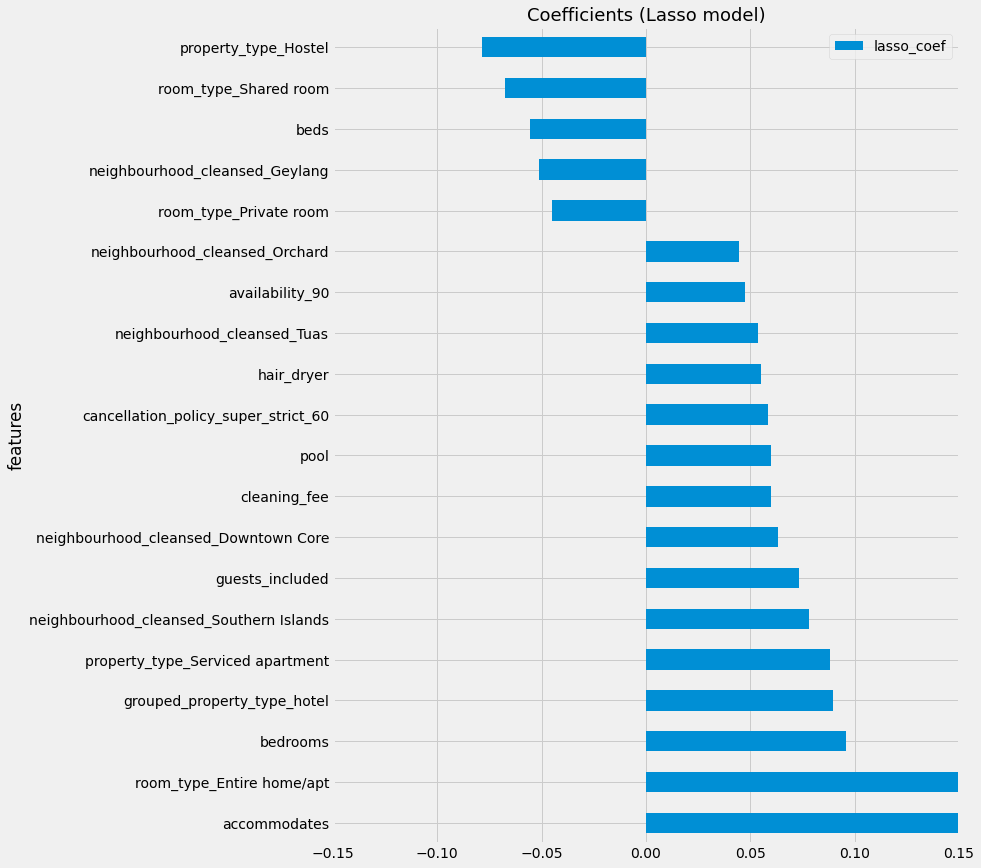

In [21]:
# Plot coefficients

plt.rcParams['figure.figsize'] = (10, 14)
important_coefs.plot(y = 'lasso_coef', x = 'features', kind = 'barh');
plt.title('Coefficients (Lasso model)', fontsize = 18);
plt.xlim(-0.15, 0.15);

### Model 2: Neural Network

The evaluation metrics used will be mean squared error - for loss and R2 - for accuracy.

### NN

In [22]:
# Building the model
model = Sequential()

model.add(Dense(128, input_shape=(X_ss_train.shape[1],), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compiling the model
model.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_squared_error'])

# Model summary
print(model.summary())

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               17536     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 116,609
Trainable params: 116,609
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
history = model.fit(X_ss_train,
                    y_train,
                    epochs=100,
                    batch_size=256,
                    validation_data=(X_ss_test, y_test),
                    verbose=0)

In [24]:
# MSE and R2 values

y_test_pred = model.predict(X_ss_test)
y_train_pred = model.predict(X_ss_train)
print("Training MSE:", round(mean_squared_error(y_train, y_train_pred),4))
print("Validation MSE:", round(mean_squared_error(y_test, y_test_pred),4))
print("\nTraining r2:", round(r2_score(y_train, y_train_pred),4))
print("Validation r2:", round(r2_score(y_test, y_test_pred),4))

Training MSE: 0.0055
Validation MSE: 0.2617

Training r2: 0.9909
Validation r2: 0.567


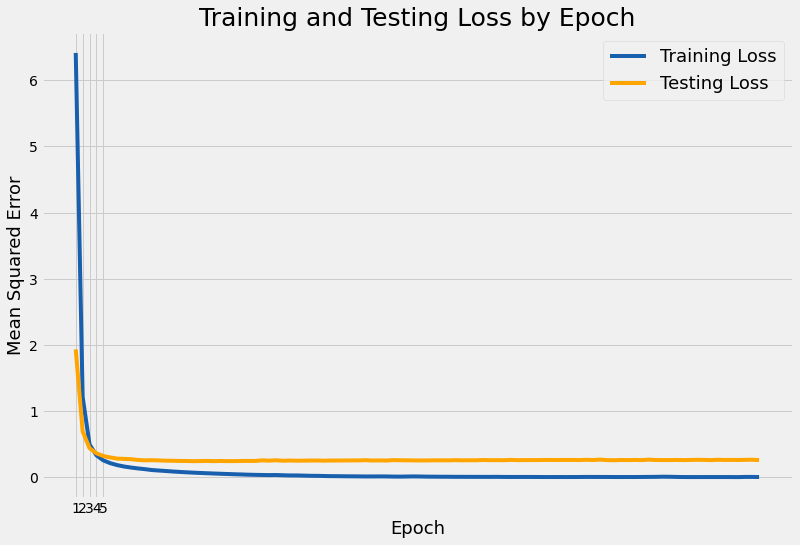

In [25]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')
# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Mean Squared Error', fontsize = 18)
plt.xticks([0, 1, 2, 3, 4], [1, 2, 3, 4, 5])

plt.legend(fontsize = 18);

In [26]:
# Building the model
model2 = Sequential()
model2.add(Dropout(0.2, input_shape=(X_ss_train.shape[1],)))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation='linear'))

# Compiling the model
model2.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_squared_error'])

# Model summary
print(model2.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_1 (Dropout)          (None, 136)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               17536     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               131584    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)              

In [27]:
history = model2.fit(X_ss_train,
                     y_train,
                     epochs=100,
                     batch_size=256,
                     validation_data=(X_ss_test, y_test),
                     verbose=0)

In [28]:
# MSE and R2 values

y_test_pred = model2.predict(X_ss_test)
y_train_pred = model2.predict(X_ss_train)
print("Training MSE:", round(mean_squared_error(y_train, y_train_pred),4))
print("Validation MSE:", round(mean_squared_error(y_test, y_test_pred),4))
print("\nTraining r2:", round(r2_score(y_train, y_train_pred),4))
print("Validation r2:", round(r2_score(y_test, y_test_pred),4))

Training MSE: 0.2331
Validation MSE: 0.341

Training r2: 0.6132
Validation r2: 0.4358


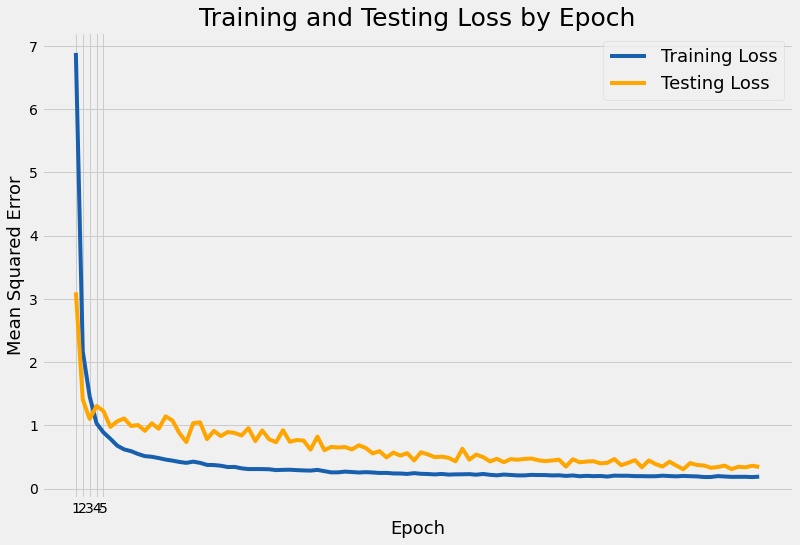

In [29]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')
# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Mean Squared Error', fontsize = 18)
plt.xticks([0, 1, 2, 3, 4], [1, 2, 3, 4, 5])

plt.legend(fontsize = 18);

In [30]:
model = Sequential()

model.add(Dense(128, activation = 'relu', input_dim = n_inputs))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_squared_error'])
early_stop = EarlyStopping(monitor = 'val_loss', 
                           min_delta = 0, 
                           patience = 0)
history = model.fit(X_ss_train,
                    y_train, 
                    validation_data = (X_ss_test, y_test), 
                    epochs = 100, 
                    callbacks = [early_stop], 
                    verbose = 0)

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               17536     
_________________________________________________________________
dense_10 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_11 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 257       
Total params: 116,609
Trainable params: 116,609
Non-trainable params: 0
_________________________________________________________________
None


In [31]:
y_test_pred = model.predict(X_ss_test)
y_train_pred = model.predict(X_ss_train)
print("Training MSE:", round(mean_squared_error(y_train, y_train_pred),4))
print("Validation MSE:", round(mean_squared_error(y_test, y_test_pred),4))
print("\nTraining r2:", round(r2_score(y_train, y_train_pred),4))
print("Validation r2:", round(r2_score(y_test, y_test_pred),4))

Training MSE: 0.1298
Validation MSE: 0.2673

Training r2: 0.7846
Validation r2: 0.5577


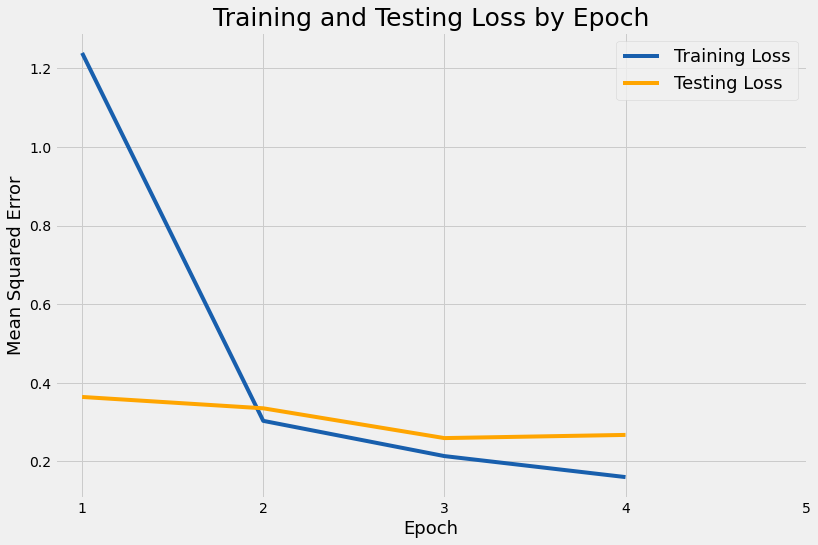

In [32]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')
# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Mean Squared Error', fontsize = 18)
plt.xticks([0, 1, 2, 3, 4], [1, 2, 3, 4, 5])

plt.legend(fontsize = 18);

#### XGBoost

In [33]:
xgb_reg_start = time.time()

xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_ss_train, y_train)
training_preds_xgb_reg = xgb_reg.predict(X_ss_train)
val_preds_xgb_reg = xgb_reg.predict(X_ss_test)

xgb_reg_end = time.time()

print(f"Time taken to run: {round((xgb_reg_end - xgb_reg_start)/60,1)} minutes")
print("\nTraining MSE:", round(mean_squared_error(y_train, training_preds_xgb_reg),4))
print("Validation MSE:", round(mean_squared_error(y_test, val_preds_xgb_reg),4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_xgb_reg),4))
print("Validation r2:", round(r2_score(y_test, val_preds_xgb_reg),4))

Time taken to run: 0.1 minutes

Training MSE: 0.0246
Validation MSE: 0.1734

Training r2: 0.9593
Validation r2: 0.713


This means that our features explain approximately 95% of the variance in our target variable.

In [34]:
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)
ft_weights_xgb_reg

,weight
property_type_Farm stay,0.000000
property_type_Tent,0.000000
neighbourhood_cleansed_Sungei Kadut,0.000000
neighbourhood_cleansed_Central Water Catchment,0.000000
bed_type_Pull-out Sofa,0.000000
...,...
cancellation_policy_super_strict_60,0.021877
bedrooms,0.022833
property_type_Serviced apartment,0.048245
grouped_property_type_hotel,0.057422


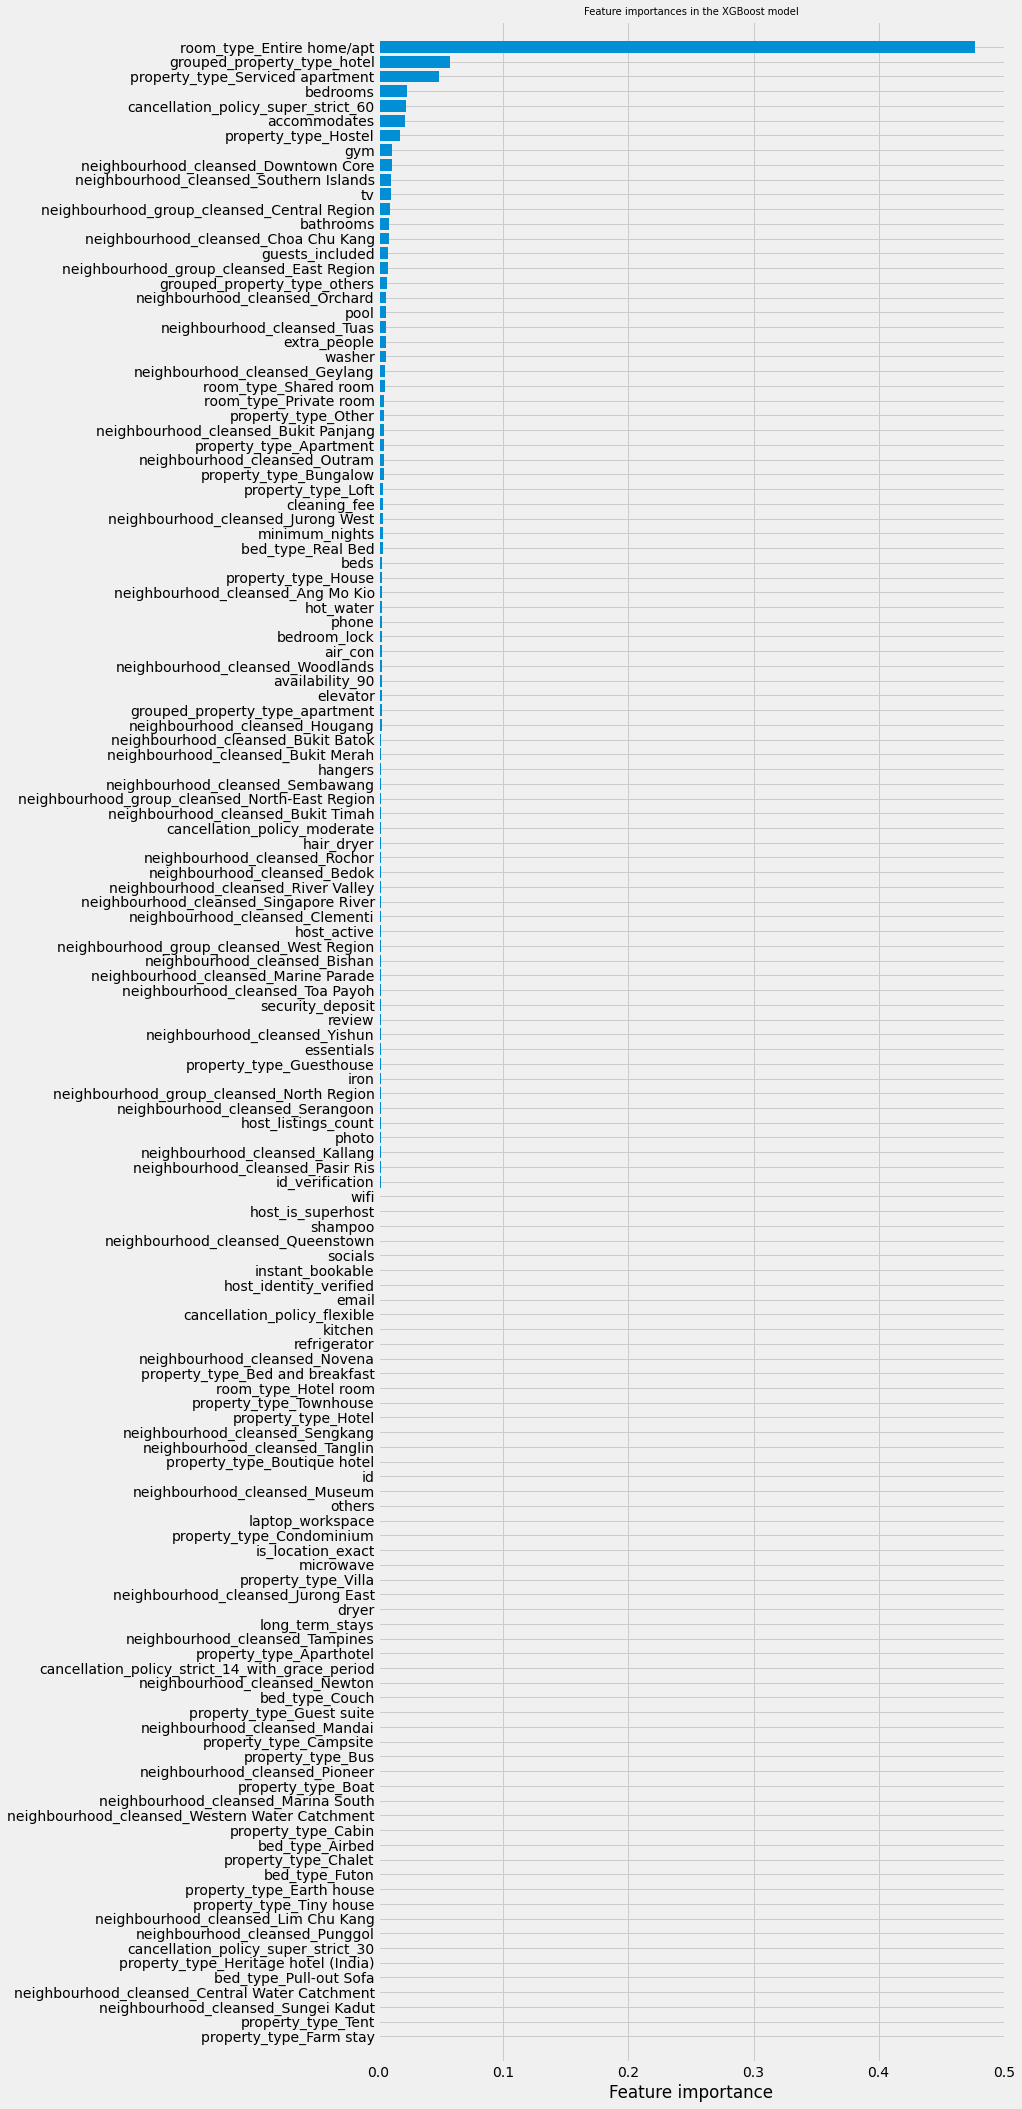

In [35]:
# plotting feature importances
plt.figure(figsize=(10,35))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=10)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

In [36]:
airbnb_df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

**The top 10 most important features are:**

+ Room Type - Entire home/apartment
+ Property Type - Hotel
+ Property Type - Serviced apartment
+ The number of bedrooms
+ Cancellation Policy - Super strict 60
+ The number of accommodates
+ Property Type - Hostel
+ Whether the place has a gym
+ Neighbourhood_cleansed - Downtown Core
+ Neighbourhood_cleansed - Southern Island

The most important feature is what type of room it is classified as, where entire home/apt would fetch a higher price as compared to a hotel/private/shared room. Even property types and the number of bedrooms are understandably important features that one would certainly consider when deciding for an apartment to book.

The top 10 features do make sense as they are all features to consider when one is comparing between apartments.